In [46]:
# importing Required libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [47]:
# importing Data using Pandas library

data=pd.read_csv(r"C:\Users\Venkatesham\Downloads\dataframe_.csv")
data

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

In [48]:
#Shape of dataset

data.shape

(1697, 2)

In [49]:
# information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [50]:
# checking null values

data.isnull().sum()

input     1
output    1
dtype: int64

In [51]:
# dropped null values

data.dropna (inplace=True)

In [52]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [53]:
# shape of dataset after dropping null values
data.shape

(1696, 2)

In [54]:
# checking the percentage of missing Values

np.round(((data.isnull().sum()/len(data))*100),2)

input     0.0
output    0.0
dtype: float64

In [55]:
# checking duplicates 

data.duplicated().sum()

606

In [56]:
# dropped duplicates

data.drop_duplicates(keep="first",inplace=True)

In [57]:
data.duplicated().sum()

0

In [58]:
data.reset_index(inplace=True,drop=True)

In [59]:
data

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1085 -112.018496  121.096397
1086 -119.954237  123.609122
1087 -109.942155  127.197394
1088 -111.515368  128.170885
1089 -110.344221  123.087950

[1090 rows x 2 columns]

## Data Visualization

<AxesSubplot:>

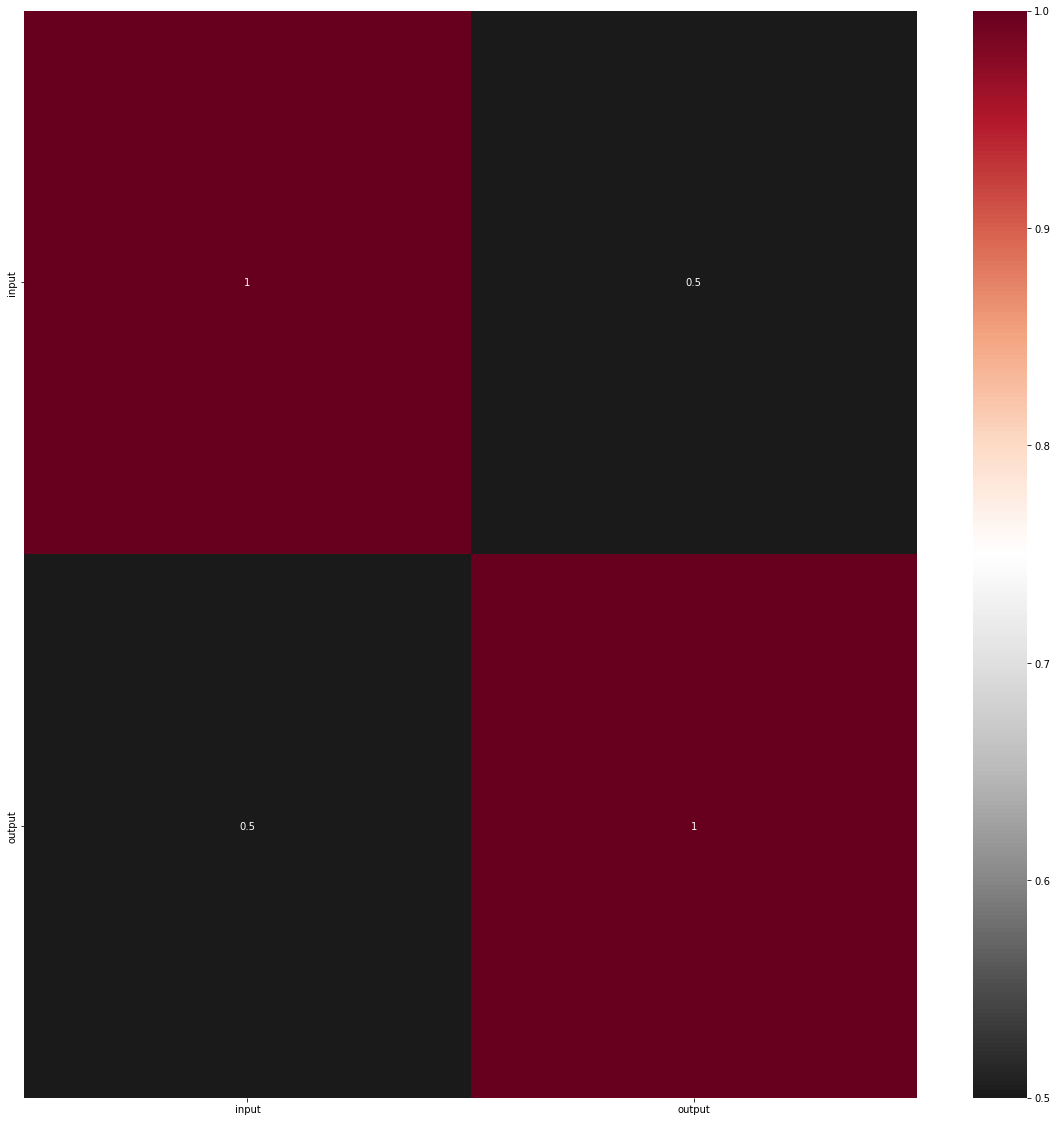

In [60]:
# corrplot

plt.figure(figsize=(20,20))
sns.heatmap(data.corr().round(1),annot=True,cmap="RdGy_r")

Text(0.5, 1.0, 'Input vs Output')

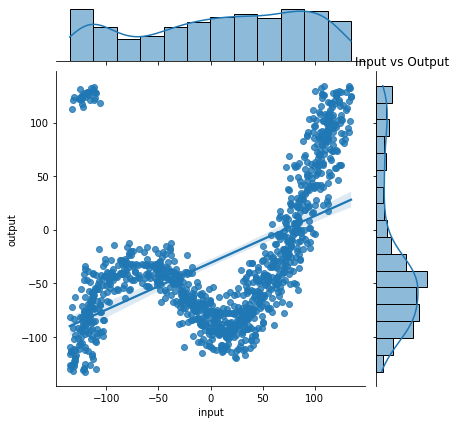

In [89]:
# jointplot using sns

sns.jointplot(x = "input", y = "output", kind = "reg", data = data)
plt.title('Input vs Output')

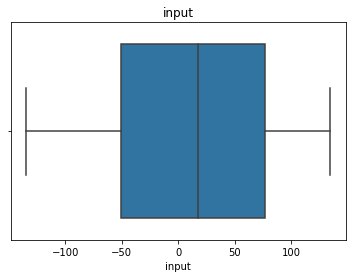

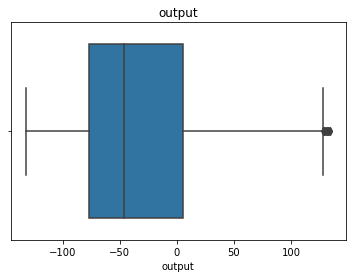

In [64]:
# box plot of input and output

for i in data.columns:
    
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

In [65]:
seperating fv

fv=data.iloc[:,:-1]
fv

input
0    -122.740667
1    -121.531419
2    -134.917019
3    -120.605951
4    -129.894781
...          ...
1085 -112.018496
1086 -119.954237
1087 -109.942155
1088 -111.515368
1089 -110.344221

[1090 rows x 1 columns]

In [66]:
fv=data.iloc[:,:-1]
fv["input"].tolist()

[-122.7406674,
 -121.5314194,
 -134.917019,
 -120.6059511,
 -129.8947807,
 -134.3666687,
 -115.5637388,
 -132.0801614,
 -133.3666687,
 -119.5241123,
 -125.743622,
 -133.3666687,
 -114.1008952,
 -131.3666687,
 -113.2783381,
 -133.8181748,
 -121.6535425,
 -127.3666687,
 -108.4996398,
 -111.2536771,
 -124.3666687,
 -119.1166023,
 -114.4105263,
 -122.3666687,
 -131.9053601,
 -109.2783685,
 -105.5046405,
 -122.3666687,
 -112.2579067,
 -111.0440481,
 -126.6376399,
 -120.3666687,
 -125.0856202,
 -103.409788,
 -115.2626373,
 -119.3666687,
 -104.9065286,
 -99.7125535,
 -117.3666687,
 -116.3328387,
 -125.3821591,
 -103.2199847,
 -115.3666687,
 -120.2750927,
 -113.2574809,
 -96.69835134,
 -115.3666687,
 -101.9974407,
 -111.9026024,
 -130.789929,
 -112.3666687,
 -98.94771821,
 -104.681987,
 -112.8669092,
 -110.3666687,
 -108.6044447,
 -96.69369402,
 -113.9676037,
 -109.3666687,
 -124.5036828,
 -117.2137042,
 -121.2046658,
 -107.3666687,
 -104.9610089,
 -117.6854971,
 -89.40230539,
 -103.3666687,
 

In [67]:
# cl
label=data[["output"]]

In [68]:
label

output
0    -130.572085
1    -129.938929
2    -130.141832
3    -125.760932
4    -112.785214
...          ...
1085  121.096397
1086  123.609122
1087  127.197394
1088  128.170885
1089  123.087950

[1090 rows x 1 columns]

In [69]:
splitting dataset

x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.7)

In [70]:
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

<AxesSubplot:xlabel='output'>

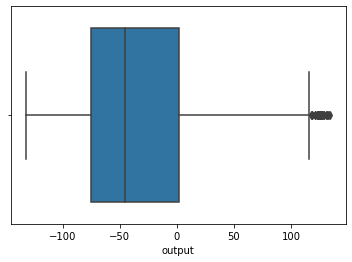

In [71]:
# checking outliers 

sns.boxplot(y_train["output"])

In [72]:
o=np.percentile(y_train["output"].values,[25,50,75])

In [73]:
iqr=o[-1]-o[0]

In [74]:
lw=o[0]-(1.5*iqr)
ul=o[-1]+(1.5*iqr)

In [75]:
lw

-189.98632228675004

In [76]:
ul

116.15977977125003

In [77]:
y_train.loc[(y_train["output"]<lw)]

Empty DataFrame
Columns: [output]
Index: []

In [78]:
y_train.loc[(y_train["output"]>ul)]=ul

<AxesSubplot:xlabel='output'>

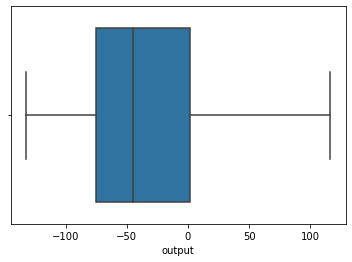

In [79]:
sns.boxplot(y_train["output"])

In [80]:
# Building a linear regression model 

lr=LinearRegression()

In [81]:
model=lr.fit(x_train,y_train)

In [82]:
predicted=model.predict(x_test)

In [83]:
mean_squared_error(y_test,predicted)

3585.713379821481

In [84]:
r2_score(y_test,predicted)

0.29981964534355743

In [85]:
model.coef_

array([[0.41121895]])

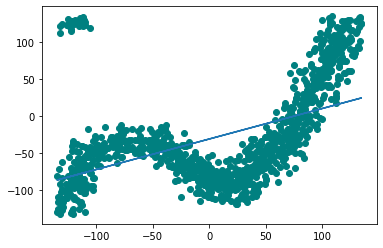

In [86]:
plt.scatter(fv,label,color='teal')
plt.plot(fv["input"],model.predict(fv).reshape(len(model.predict(fv),)))

In [87]:
predicted=model.predict(fv).reshape(len(model.predict(fv),))

In [88]:
predicted

array([-81.72929271, -81.23202702, -86.73643926, ..., -76.46630177,
       -77.11323702, -76.63163918])

In [93]:
model.intercept_

array([-31.25600407])